# Problem *Traveling Tournament*

Given n teams (n being even), a round-robin tournament is a tournament among the teams so that every team plays each other team. Such a tournament has n-1 rounds (slots or weeks) during which n/2 games are played. For each game, one team is denoted the home team and its opponent the away team. A double-robin tournament has 2(n-1) rounds and has every pair of teams playing twice, once at home and the once away.  
Distances between team sites are given by an n by n distance matrix. When a teams plays an away game, it is assumed to travel from its home site to the away venue. When playing consecutive away games, teams travel from one away venue to the next directly. It is forbidden for a team to play more than two consecutive times at home or away. The sum of the traveling distance of each team has to be minimized.

Traveling Tournament. <small> Image from [freesvg.org](https://freesvg.org/vector-graphics-of-hockey-tournament-icon) </small>
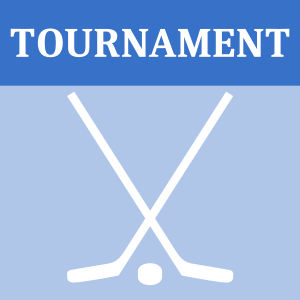

To build a COP (Constraint Optimization Problem) model, we need first to import the library PyCSP$^3$:

In [1]:
from pycsp3 import *

Then, we need some data. In our case, this is distance matrix.

In [2]:
distances = [
    [0,10,15,34],
    [10,0,22,32],
    [15,22,0,47],
    [34,32,47,0]
]

We define a few constants.

In [3]:
nTeams = len(distances)
nRounds = len(distances) * 2 - 2
assert nTeams % 2 == 0, "An even number of teams is expected"

We gently start our COP model with a two-dimensional array $o$ of $4 \times 6$ variables. This will allow us to represent, for any team $i$, its opponent at every round.

In [4]:
# o[i][k] is the opponent (team) of the ith team at the kth round
o = VarArray(size=[nTeams, nRounds], dom=range(nTeams))

We can display (the structure of) this array as well as the domain of the involved variables.

In [5]:
print("Array of variable o: ", o)
print("Domain of any variable in o: ", o[0][0].dom)

Array of variable o:  [
  [o[0][0], o[0][1], o[0][2], o[0][3], o[0][4], o[0][5]]
  [o[1][0], o[1][1], o[1][2], o[1][3], o[1][4], o[1][5]]
  [o[2][0], o[2][1], o[2][2], o[2][3], o[2][4], o[2][5]]
  [o[3][0], o[3][1], o[3][2], o[3][3], o[3][4], o[3][5]]
]
Domain of any variable in o:  0..3


## Setting Games

Concerning the constraints, we first post a group of constraints *Cardinality*.

In [6]:
satisfy(
    # each team must play exactly two times against each other team
    Cardinality(o[i], occurrences={j: 2 for j in range(nTeams) if j != i}) for i in range(nTeams)
);

We can display the internal representation of the posted constraints; this way, although a little bit technical, we can check that the constraints are correctly posted.

In [7]:
print(posted())

cardinality(list:[o[0][0], o[0][1], o[0][2], o[0][3], o[0][4], o[0][5]], values:[1, 2, 3], occurs:[2, 2, 2])
cardinality(list:[o[1][0], o[1][1], o[1][2], o[1][3], o[1][4], o[1][5]], values:[0, 2, 3], occurs:[2, 2, 2])
cardinality(list:[o[2][0], o[2][1], o[2][2], o[2][3], o[2][4], o[2][5]], values:[0, 1, 3], occurs:[2, 2, 2])
cardinality(list:[o[3][0], o[3][1], o[3][2], o[3][3], o[3][4], o[3][5]], values:[0, 1, 2], occurs:[2, 2, 2])


Interestingly, by calling the function *solve()*, we can check that the problem is satisfiable (SAT). We can also display the values of variables in $o$. Here, we call the function *values()* that collects the values assigned to a specified list of variables.

In [8]:
if solve() is SAT:
    print(values(o))

  Actually, the instance was not solved


In this first "solution", one can see that much remains to be done. For example, if we have team i playing against team j at round k, then team j must play against i at the same round. 

We need some constraints *Element* to capture this.

In [9]:
satisfy(
    # ensuring symmetry of games: if team i plays against j at round k, then team j plays against i at round k
    o[o[i][k]][k] == i for i in range(nTeams) for k in range(nRounds)
);

By calling *posted(-1)* we can get the constraints that have been posted during the last call to *satisfy()*.

In [10]:
print(posted(-1))

element(list:[o[0][0], o[1][0], o[2][0], o[3][0]], index:o[0][0], condition:(eq,0))
element(list:[o[0][1], o[1][1], o[2][1], o[3][1]], index:o[0][1], condition:(eq,0))
element(list:[o[0][2], o[1][2], o[2][2], o[3][2]], index:o[0][2], condition:(eq,0))
element(list:[o[0][3], o[1][3], o[2][3], o[3][3]], index:o[0][3], condition:(eq,0))
element(list:[o[0][4], o[1][4], o[2][4], o[3][4]], index:o[0][4], condition:(eq,0))
element(list:[o[0][5], o[1][5], o[2][5], o[3][5]], index:o[0][5], condition:(eq,0))
element(list:[o[0][0], o[1][0], o[2][0], o[3][0]], index:o[1][0], condition:(eq,1))
element(list:[o[0][1], o[1][1], o[2][1], o[3][1]], index:o[1][1], condition:(eq,1))
element(list:[o[0][2], o[1][2], o[2][2], o[3][2]], index:o[1][2], condition:(eq,1))
element(list:[o[0][3], o[1][3], o[2][3], o[3][3]], index:o[1][3], condition:(eq,1))
element(list:[o[0][4], o[1][4], o[2][4], o[3][4]], index:o[1][4], condition:(eq,1))
element(list:[o[0][5], o[1][5], o[2][5], o[3][5]], index:o[1][5], condition:

we can run again the solver.

In [11]:
if solve() is SAT:
    print(values(o))

[
  [1, 1, 2, 2, 3, 3]
  [0, 0, 3, 3, 2, 2]
  [3, 3, 0, 0, 1, 1]
  [2, 2, 1, 1, 0, 0]
]


This is better. But for the moment, we have no information at all about which teams play home and which teams play away.

## Handling Home and Away Games

We now need to introduce a two-dimensional array $h$ of $4 \times 6$ variables. This will allows us to represent, for any team $i$, its situation (home or away) at every round.

In [12]:
# h[i][k] is 1 iff the ith team plays at home at the kth round
h = VarArray(size=[nTeams, nRounds], dom={0, 1})

We can display (the structure of) this array as well as the domain of any involved variable.

In [13]:
print("Array of variable h: ", h)
print("Domain of any variable in h: ", h[0][0].dom)

Array of variable h:  [
  [h[0][0], h[0][1], h[0][2], h[0][3], h[0][4], h[0][5]]
  [h[1][0], h[1][1], h[1][2], h[1][3], h[1][4], h[1][5]]
  [h[2][0], h[2][1], h[2][2], h[2][3], h[2][4], h[2][5]]
  [h[3][0], h[3][1], h[3][2], h[3][3], h[3][4], h[3][5]]
]
Domain of any variable in h:  0 1


At any round, the opponent of team i plays at home if i plays away, and vice versa. 
To capture this, we use a group of constraints *Element*.

In [14]:
satisfy(
    # channeling the arrays o and h
    h[o[i][k]][k] != h[i][k] for i in range(nTeams) for k in range(nRounds)
);

We display the first 8 constraints that have been posted in this group.

In [15]:
print(posted(-1)[:8])

element(list:[h[0][0], h[1][0], h[2][0], h[3][0]], index:o[0][0], condition:(ne,h[0][0]))
element(list:[h[0][1], h[1][1], h[2][1], h[3][1]], index:o[0][1], condition:(ne,h[0][1]))
element(list:[h[0][2], h[1][2], h[2][2], h[3][2]], index:o[0][2], condition:(ne,h[0][2]))
element(list:[h[0][3], h[1][3], h[2][3], h[3][3]], index:o[0][3], condition:(ne,h[0][3]))
element(list:[h[0][4], h[1][4], h[2][4], h[3][4]], index:o[0][4], condition:(ne,h[0][4]))
element(list:[h[0][5], h[1][5], h[2][5], h[3][5]], index:o[0][5], condition:(ne,h[0][5]))
element(list:[h[0][0], h[1][0], h[2][0], h[3][0]], index:o[1][0], condition:(ne,h[1][0]))
element(list:[h[0][1], h[1][1], h[2][1], h[3][1]], index:o[1][1], condition:(ne,h[1][1]))


We run the solver.

In [16]:
if solve() is SAT:
    print("Opponents: ", values(o))
    print("Playing at home: ", values(h))

Opponents:  [
  [1, 1, 2, 2, 3, 3]
  [0, 0, 3, 3, 2, 2]
  [3, 3, 0, 0, 1, 1]
  [2, 2, 1, 1, 0, 0]
]
Playing at home:  [
  [0, 0, 0, 0, 0, 0]
  [1, 1, 0, 0, 0, 0]
  [0, 0, 1, 1, 1, 1]
  [1, 1, 1, 1, 1, 1]
]


We can print something more readable.  

In [17]:
if solve() is SAT:
    for k in range(nRounds):
        matches = [(i,o[i][k].value) for i in range(nTeams) if h[i][k].value == 1]
        print(f"Matches at Round {k}: {matches}")            

Matches at Round 0: [(1, 0), (3, 2)]
Matches at Round 1: [(1, 0), (3, 2)]
Matches at Round 2: [(2, 0), (3, 1)]
Matches at Round 3: [(2, 0), (3, 1)]
Matches at Round 4: [(2, 1), (3, 0)]
Matches at Round 5: [(2, 1), (3, 0)]


We have a problem because some teams play more often at home than others. We can fix this problem by posting a group of constraints *Intension*, by calling the control function *If*:

In [18]:
satisfy(
   # playing against the same team must be done once at home and once away
   If(
       o[i][k1] == o[i][k2], 
       Then=h[i][k1] != h[i][k2]
   ) for i in range(nTeams) for k1, k2 in combinations(range(nRounds), 2)
);

We display the 10 last posted constraints.

In [19]:
print(posted()[-10:])

intension(function:imp(eq(o[3][1],o[3][2]),ne(h[3][1],h[3][2])))
intension(function:imp(eq(o[3][1],o[3][3]),ne(h[3][1],h[3][3])))
intension(function:imp(eq(o[3][1],o[3][4]),ne(h[3][1],h[3][4])))
intension(function:imp(eq(o[3][1],o[3][5]),ne(h[3][1],h[3][5])))
intension(function:imp(eq(o[3][2],o[3][3]),ne(h[3][2],h[3][3])))
intension(function:imp(eq(o[3][2],o[3][4]),ne(h[3][2],h[3][4])))
intension(function:imp(eq(o[3][2],o[3][5]),ne(h[3][2],h[3][5])))
intension(function:imp(eq(o[3][3],o[3][4]),ne(h[3][3],h[3][4])))
intension(function:imp(eq(o[3][3],o[3][5]),ne(h[3][3],h[3][5])))
intension(function:imp(eq(o[3][4],o[3][5]),ne(h[3][4],h[3][5])))


We run the solver.

In [20]:
if solve() is SAT:
    for k in range(nRounds):
        matches = [(i,o[i][k].value) for i in range(nTeams) if h[i][k].value == 1]
        print(f"Matches at Round {k}: {matches}")       

Matches at Round 0: [(1, 0), (3, 2)]
Matches at Round 1: [(0, 1), (2, 3)]
Matches at Round 2: [(2, 0), (3, 1)]
Matches at Round 3: [(0, 2), (1, 3)]
Matches at Round 4: [(2, 1), (3, 0)]
Matches at Round 5: [(0, 3), (1, 2)]


At this stage, we can compute the number of solutions: it is 5760. 

## Handling Consecutive Matches at Home and Away

For ensuring that at most each team plays two times consecutively at home or away, we can impose, for every team i, a regular expression on the variables $h[i]$. We invite the reader to draw the automaton that corresponds to the one returned by the following function.

In [21]:
def automaton():
    qi, q01, q02, q03, q11, q12, q13 = states = "q", "q01", "q02", "q03", "q11", "q12", "q13"
    trs = [(qi, 0, q01), (qi, 1, q11), (q01, 0, q02), (q01, 1, q11), 
           (q11, 0, q01), (q11, 1, q12), (q02, 1, q11), (q12, 0, q01)]
    return Automaton(start=qi, transitions=trs, final=states[1:])

We build the automaton.

In [22]:
A = automaton()

We can control the automaton by displaying it.

In [23]:
print(A)

Automaton(start=q, transitions={(q,0,q01),(q,1,q11),(q01,0,q02),(q01,1,q11),(q11,0,q01),(q11,1,q12),(q02,1,q11),(q12,0,q01)}, final=[q01,q02,q11,q12])


We post a group of constraints *Regular*.

In [24]:
satisfy(
    # at most 2 consecutive games at home, or consecutive games away
    h[i] in A for i in range(nTeams)
);

We display the last posted constraints.

In [25]:
print(posted(-1))

regular(list:[h[0][0], h[0][1], h[0][2], h[0][3], h[0][4], h[0][5]], transitions:(q,0,q01)(q,1,q11)(q01,0,q02)(q01,1,q11)(q11,0,q01)(q11,1,q12)(q02,1,q11)(q12,0,q01), start:q, final:[q01, q02, q11, q12])
regular(list:[h[1][0], h[1][1], h[1][2], h[1][3], h[1][4], h[1][5]], transitions:(q,0,q01)(q,1,q11)(q01,0,q02)(q01,1,q11)(q11,0,q01)(q11,1,q12)(q02,1,q11)(q12,0,q01), start:q, final:[q01, q02, q11, q12])
regular(list:[h[2][0], h[2][1], h[2][2], h[2][3], h[2][4], h[2][5]], transitions:(q,0,q01)(q,1,q11)(q01,0,q02)(q01,1,q11)(q11,0,q01)(q11,1,q12)(q02,1,q11)(q12,0,q01), start:q, final:[q01, q02, q11, q12])
regular(list:[h[3][0], h[3][1], h[3][2], h[3][3], h[3][4], h[3][5]], transitions:(q,0,q01)(q,1,q11)(q01,0,q02)(q01,1,q11)(q11,0,q01)(q11,1,q12)(q02,1,q11)(q12,0,q01), start:q, final:[q01, q02, q11, q12])


In [26]:
if solve() is SAT:
    for k in range(nRounds):
        matches = [(i,o[i][k].value) for i in range(nTeams) if h[i][k].value == 1]
        print(f"Matches at Round {k}: {matches}")     

Matches at Round 0: [(1, 0), (3, 2)]
Matches at Round 1: [(0, 1), (2, 3)]
Matches at Round 2: [(2, 0), (3, 1)]
Matches at Round 3: [(0, 2), (1, 3)]
Matches at Round 4: [(2, 1), (3, 0)]
Matches at Round 5: [(0, 3), (1, 2)]


It may be the case that the solution is the same as previously as if the new constraints were useless (actually, this is mainly due to the small number of teams). However, if we compare the 5760 earlier solutions to the 2208 that we obtain now, can can see the real effect of the posted constraints *Regular*.

In [27]:
if solve(sols=ALL) is SAT:
    print("Number of solutions: ", n_solutions())

Number of solutions:  2208


## Computing Traveled Distances

For dealing with distances traveled by teams at every round, we introduce a two-dimensional array $t$ $4 \times 7$ variables.

In [28]:
# t[i][k] is the travelled distance by the ith team at the kth round. 
# An additional round is considered for returning at home.
t = VarArray(size=[nTeams, nRounds + 1], dom=distances)

The structure of this array and the domain of the involved variables are as follows:

In [29]:
print("Array of variable t: ", t)
print("Domain of any variable in t: ", t[0][0].dom)

Array of variable t:  [
  [t[0][0], t[0][1], t[0][2], t[0][3], t[0][4], t[0][5], t[0][6]]
  [t[1][0], t[1][1], t[1][2], t[1][3], t[1][4], t[1][5], t[1][6]]
  [t[2][0], t[2][1], t[2][2], t[2][3], t[2][4], t[2][5], t[2][6]]
  [t[3][0], t[3][1], t[3][2], t[3][3], t[3][4], t[3][5], t[3][6]]
]
Domain of any variable in t:  0 10 15 22 32 34 47


Each team is supposed to be at home initially, and at the end of the double-robin tournament. Then, to compute the traveled distance by the team i for the first game or the last game, we use the following function: 

In [30]:
def table_end(i):  # traveled distance for the first or last game of the ith team
    return [(1, ANY, 0)] + [(0, j, distances[i][j]) for j in range(nTeams) if j != i]

This function returns a set (list) of 3-tuples where, for each tuple, the first value indicates if team i plays at home (1) or away(0), the second value is the opponent team, and the third value is the traveled distance. For example, if we print the table for the team 0, we can see that :
- playing at home against any team (*) requires traveling 0
- playing away against team 1 requires traveling 10
- playing away against team 2 requires traveling 15
- playing away against team 3 requires traveling 34

In [31]:
print(table_end(0))

[(1, *, 0), (0, 1, 10), (0, 2, 15), (0, 3, 34)]


For the other matches, we use some other tables, those returned by the following function:

In [32]:
def table(i):  # traveled distance for the a game that is not the first or last one of the ith team
    return ([(1, 1, ANY, ANY, 0)] +
            [(0, 1, j, ANY, distances[i][j]) for j in range(nTeams) if j != i] +
            [(1, 0, ANY, j, distances[i][j]) for j in range(nTeams) if j != i] +
            [(0, 0, j1, j2, distances[j1][j2]) for j1 in range(nTeams) for j2 in range(nTeams) 
              if different_values(i, j1, j2)])


This function returns a set (list) of 5-tuples where, for each tuple, the first value indicates if team i plays at home (1) or away(0) for the first match (of two consecutive matches), the second value indicates if team i plays at home (1) or away(0) for the second match, the third value is the opponent team for the first match, the fourth value is the opponent team for the second match, and the fifth value is the traveled distance. For example, if we print the table for the team 0, we can see that for any two consecutive matches involving team 0:
- playing at home twice against any team (*) requires traveling 0
- playing away against team 1 and then at home against any team requires traveling 10
- playing away against team 2 and then at home against any team requires traveling 15
- playing at home against any team and then away against team 1 requires traveling 10
- ...
- playing away against team 1 and then away against any team 2 requires traveling 22
- playing away against team 1 and then away against any team 3 requires traveling 32
- ...

In [33]:
print(table(0))

[(1, 1, *, *, 0), (0, 1, 1, *, 10), (0, 1, 2, *, 15), (0, 1, 3, *, 34), (1, 0, *, 1, 10), (1, 0, *, 2, 15), (1, 0, *, 3, 34), (0, 0, 1, 2, 22), (0, 0, 1, 3, 32), (0, 0, 2, 1, 22), (0, 0, 2, 3, 47), (0, 0, 3, 1, 32), (0, 0, 3, 2, 47)]


We can now post three groups of constraints *Extension* to be able to compute the distances traveled by all teams.

In [34]:
satisfy(
    # handling traveling for the first game
    [(h[i][0], o[i][0], t[i][0]) in table_end(i) for i in range(nTeams)],

    # handling traveling for the last game
    [(h[i][-1], o[i][-1], t[i][-1]) in table_end(i) for i in range(nTeams)],

    # handling traveling for two successive games
    [(h[i][k], h[i][k + 1], o[i][k], o[i][k + 1], t[i][k + 1]) in table(i) 
      for i in range(nTeams) for k in range(nRounds - 1)]
);

We can display the last posted constraint to control that the table is perfectly computed.

In [35]:
print(posted(-1,-1))

extension(list:[h[3][4], h[3][5], o[3][4], o[3][5], t[3][5]], supports:(0,0,0,1,10)(0,0,0,2,15)(0,0,1,0,10)(0,0,1,2,22)(0,0,2,0,15)(0,0,2,1,22)(0,1,0,*,34)(0,1,1,*,32)(0,1,2,*,47)(1,0,*,0,34)(1,0,*,1,32)(1,0,*,2,47)(1,1,*,*,0))


We can run the solver.

In [36]:
if solve() is SAT:
    for k in range(nRounds):
        matches = [(i,o[i][k].value) for i in range(nTeams) if h[i][k].value == 1]
        print(f"Matches at Round {k}: {matches}")  
    for i in range(nTeams):
         print(f"Distance traveled by team {i}: {sum(t[i][k].value for k in range(nRounds))}")  
    print(f"Overall traveled distance: {sum(t[i][k].value for i in range(nTeams) for k in range(nRounds))}")

Matches at Round 0: [(0, 1), (3, 2)]
Matches at Round 1: [(2, 1), (3, 0)]
Matches at Round 2: [(1, 3), (2, 0)]
Matches at Round 3: [(0, 3), (1, 2)]
Matches at Round 4: [(0, 2), (3, 1)]
Matches at Round 5: [(1, 0), (2, 3)]
Distance traveled by team 0: 106
Distance traveled by team 1: 111
Distance traveled by team 2: 141
Distance traveled by team 3: 123
Overall traveled distance: 481


This is certainly not the cheapest solution in term of traveling.

## Minimizing Traveled Distances

The last thing to do is to post an objective function.

In [37]:
minimize(
    # minimizing summed up traveled distance
    Sum(t)
);

We can run the solver, with this optimization task. Note that we need to check that the status returned by the solver is now OPTIMUM. 

In [38]:
if solve() is OPTIMUM:
    for k in range(nRounds):
        matches = [(i,o[i][k].value) for i in range(nTeams) if h[i][k].value == 1]
        print(f"Matches at Round {k}: {matches}")  
    for i in range(nTeams):
         print(f"Distance traveled by team {i}: {sum(t[i][k].value for k in range(nRounds))}")  
    print(f"Overall traveled distance: {bound()}")

Matches at Round 0: [(0, 3), (1, 2)]
Matches at Round 1: [(1, 0), (3, 2)]
Matches at Round 2: [(2, 1), (3, 0)]
Matches at Round 3: [(0, 1), (2, 3)]
Matches at Round 4: [(0, 2), (1, 3)]
Matches at Round 5: [(2, 0), (3, 1)]
Distance traveled by team 0: 91
Distance traveled by team 1: 79
Distance traveled by team 2: 131
Distance traveled by team 3: 169
Overall traveled distance: 517


Finally, we give below the model in one piece. Here the data is expected to be given by the user (in a command line).